In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [115]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
print('Train size:', train.shape)
print('Test size:', test.shape)

Train size: (1460, 81)
Test size: (1459, 80)


In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
def get_null_data(df):
    null_elems = df.isna().sum()
    null_ser = null_elems.iloc[null_elems.nonzero()]
    null_cols = null_ser.index
    null_types = [type(train[col][0]) for col in null_cols]
    return pd.DataFrame({'Num_Null_elems' : list(null_ser.values),
                         'Type' : null_types},
                         index = null_cols)

In [7]:
null_df_train = get_null_data(train)
null_df_train

,Num_Null_elems,Type
LotFrontage,259,<class 'numpy.float64'>
Alley,1369,<class 'float'>
MasVnrType,8,<class 'str'>
MasVnrArea,8,<class 'numpy.float64'>
BsmtQual,37,<class 'str'>
BsmtCond,37,<class 'str'>
BsmtExposure,38,<class 'str'>
BsmtFinType1,37,<class 'str'>
BsmtFinType2,38,<class 'str'>
Electrical,1,<class 'str'>


In [8]:
get_null_data(test)

,Num_Null_elems,Type
MSZoning,4,<class 'str'>
LotFrontage,227,<class 'numpy.float64'>
Alley,1352,<class 'float'>
Utilities,2,<class 'str'>
Exterior1st,1,<class 'str'>
Exterior2nd,1,<class 'str'>
MasVnrType,16,<class 'str'>
MasVnrArea,15,<class 'numpy.float64'>
BsmtQual,44,<class 'str'>
BsmtCond,45,<class 'str'>


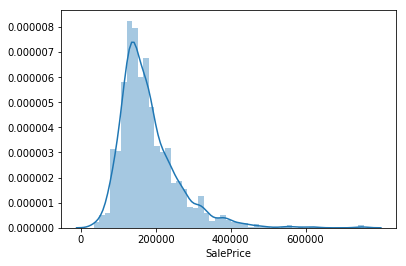

In [9]:
g = sns.distplot(train['SalePrice'])
g.set_xticks(np.arange(0,800000,200000))

The target variable has a positive skewed distribution. Thus, it will be log-transformed for the training phase and then exponentiated for correct submission format.

In [10]:
null_str_cols = null_df_train.iloc[(null_df_train['Type'] == str).values].index

In [11]:
def plot_categor(df, n_cols=3,fig_w=15,fig_h=15):
    null_df = get_null_data(df)
    null_str_cols = null_df.iloc[(null_df['Type'] == str).values].index
    n_rows = len(null_str_cols) // n_cols  + 1
    fig = plt.figure(figsize=(fig_w, fig_h))
    for i in range(len(null_str_cols)):
        plt.subplot(n_rows, n_cols, i+1)
        sns.countplot(x = null_str_cols[i], data = df[null_str_cols])

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
str_cols = []
[str_cols.append(type(train[col][0]) == str) for col in train.columns];

In [14]:
len(train.iloc[:,str_cols].columns.values)

38

In [15]:
print(train.iloc[:,str_cols].iloc[:,1:2].columns[0])
#print(type(train.iloc[:,str_cols].iloc[:,1:2].dtypes.index))

Street


In [16]:
#type(train[col][0])
def plot_categor3(df, n_cols=3,fig_w=15,fig_h=15):
    str_ind = []
    df = df.sort_values('SalePrice')
    [str_ind.append(type(train[col][0]) == str) for col in train.columns];
    categ_cols = train.iloc[:,str_ind].columns.values
    n_rows = len(categ_cols) // n_cols  + 1
    fig = plt.figure(figsize=(fig_w, fig_h))
    for i in range(len(categ_cols)):
        plt.subplot(n_rows, n_cols, i+1)
        g = sns.barplot(x=categ_cols[i], y='SalePrice', data=df, order=df['SalePrice'])
        for i in g.get_xticklabels():
            i.set_rotation(45)

In [17]:
#plot_categor3(df=train, n_cols=2, fig_h=100)

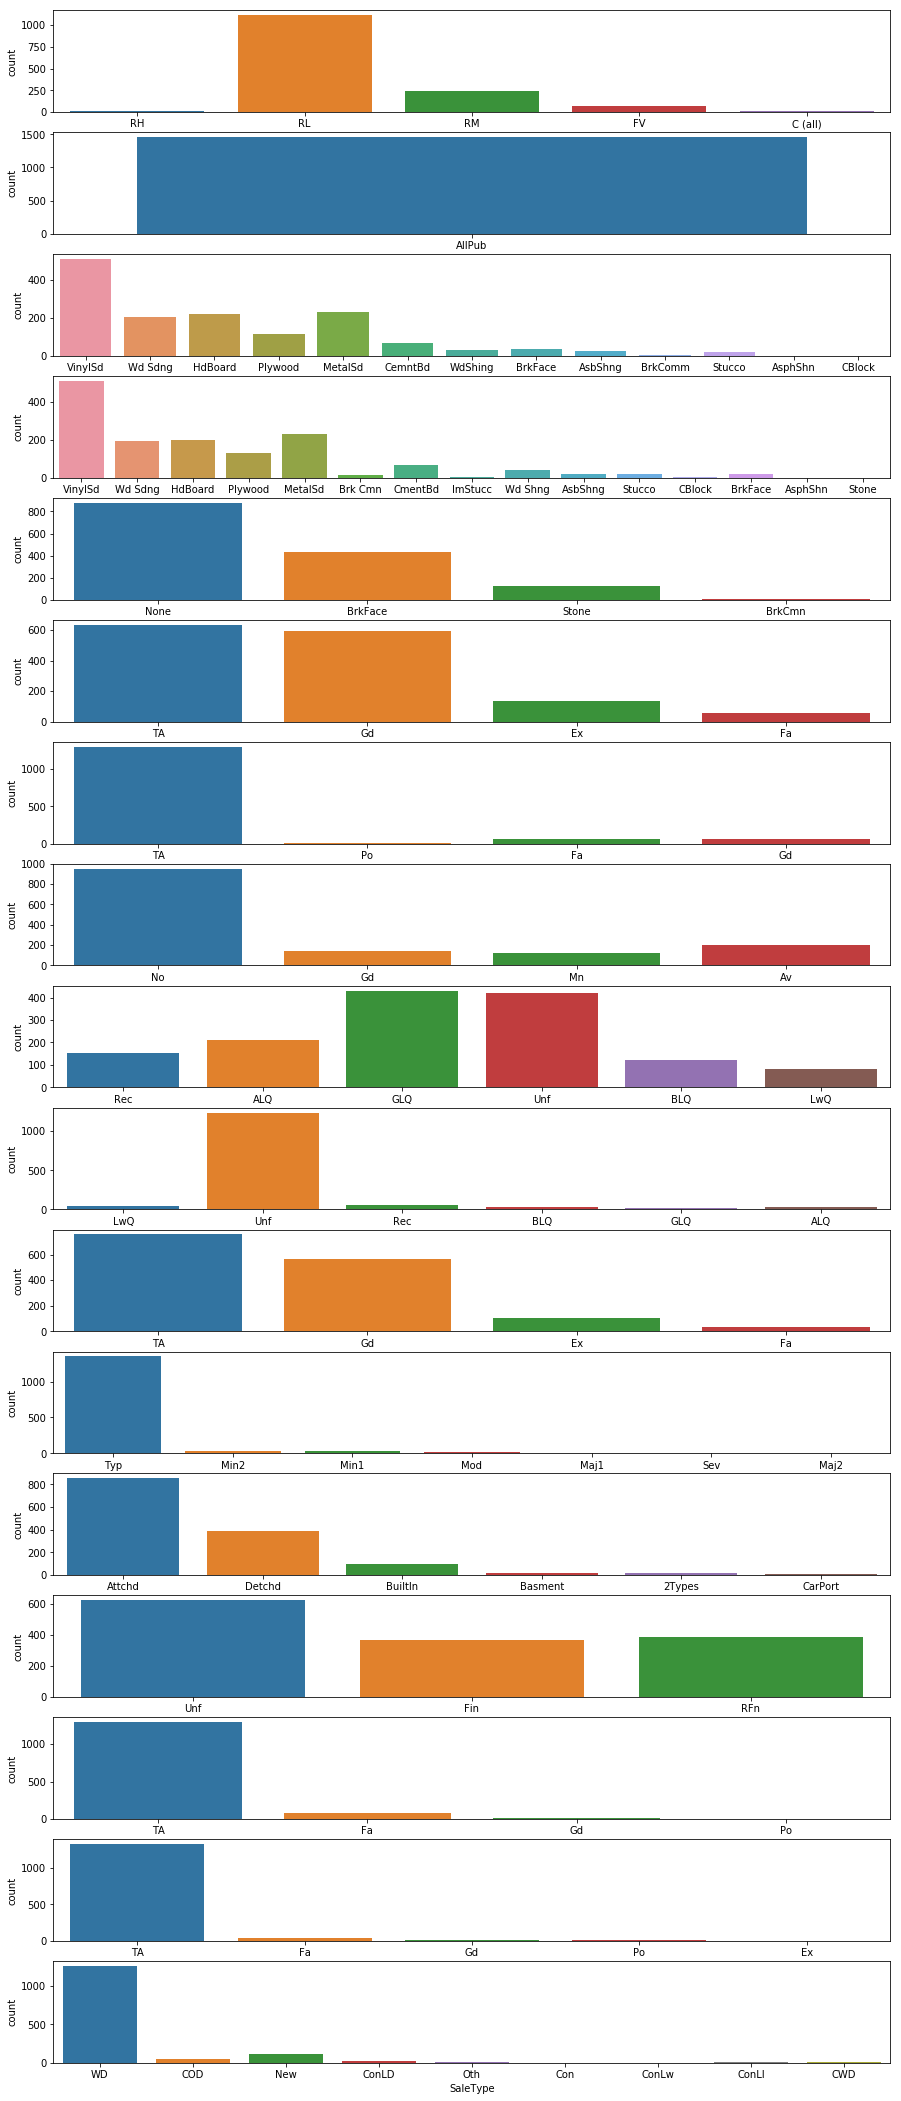

In [18]:
plot_categor(test,1, fig_h=40)

In [19]:
null_num_cols = null_df_train.iloc[(null_df_train['Type'] != str).values].index

In [20]:
null_num_cols

Index(['LotFrontage', 'Alley', 'MasVnrArea', 'FireplaceQu', 'GarageYrBlt',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

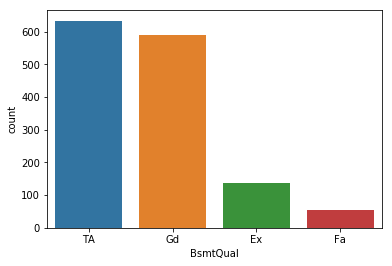

In [21]:
sns.countplot(x = null_str_cols[1], data = test[null_str_cols])

In [22]:
def plot_categor2(df, data_type, n_cols=3,fig_w=15,fig_h=15):
    null_df = get_null_data(df)
    #null_cols = null_str_cols if data_type == str else null_num_cols
    #print(null_cols)
    if data_type == str:
        null_cols = null_df.iloc[(null_df['Type'] == str).values].index
    else:
        null_cols = null_df.iloc[(null_df['Type'] != str).values].index
    print(null_cols)
    n_rows = len(null_cols) // n_cols  + 1
    fig = plt.figure(figsize=(fig_w, fig_h))
    for i in range(len(null_str_cols)):
        plt.subplot(n_rows, n_cols, i+1)
        if data_type == str:
            sns.countplot(x = null_cols[i], data = df[null_cols])
        else:
            sns.distplot(df[null_cols[i]])

In [23]:
#sns.countplot
#plot_categor2(train,int)
#sns.distplot(train['LotFrontage'])

In [24]:
ar=train.values

In [25]:
ar

array([[1, 60, 'RL', ..., 'WD', 'Normal', 208500],
       [2, 20, 'RL', ..., 'WD', 'Normal', 181500],
       [3, 60, 'RL', ..., 'WD', 'Normal', 223500],
       ...,
       [1458, 70, 'RL', ..., 'WD', 'Normal', 266500],
       [1459, 20, 'RL', ..., 'WD', 'Normal', 142125],
       [1460, 20, 'RL', ..., 'WD', 'Normal', 147500]], dtype=object)

In [26]:
subar = ar[:,[2,4]]
subar

array([['RL', 8450],
       ['RL', 9600],
       ['RL', 11250],
       ...,
       ['RL', 9042],
       ['RL', 9717],
       ['RL', 9937]], dtype=object)

In [27]:
for categ in np.unique(subar[:,0]):
    print(categ)

C (all)
FV
RH
RL
RM


In [28]:
ar.shape

(1460, 81)

In [29]:
ar[:, 80][ar[:, 2] == 'RL']

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=object)

In [30]:
#train['SalePrice']

In [31]:
ar[1,:][type(ar[1, :]) == str]

array([], shape=(0, 81), dtype=object)

In [32]:
str_ind = []
[str_ind.append(type(train[col][0]) == str) for col in train.columns];

In [33]:
sum(str_ind)

38

In [34]:
ar[:,str_ind]

array([['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'IR1', ..., 'Y', 'WD', 'Normal'],
       ...,
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal'],
       ['RL', 'Pave', 'Reg', ..., 'Y', 'WD', 'Normal']], dtype=object)

In [35]:
ar[:,str_ind][:,0]

array(['RL', 'RL', 'RL', ..., 'RL', 'RL', 'RL'], dtype=object)

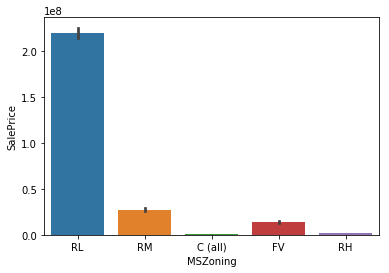

In [44]:
df = train.loc[:,['MSZoning','SalePrice']]
sns.barplot(x='MSZoning', y='SalePrice', data=df, estimator=sum)

In [43]:
df.groupby(['MSZoning'])['SalePrice'].sum()

MSZoning
C (all)       745280
FV          13910914
RH           2104934
RL         219846749
RM          27537069
Name: SalePrice, dtype: int64

In [39]:
train.iloc[:,[2,train.shape[1]-1]].groupby(['MSZoning'])['SalePrice'].sum().sort_values().index.values

array(['C (all)', 'RH', 'FV', 'RM', 'RL'], dtype=object)

In [78]:
#train.loc[:,'MSZoning'][train['MSZoning']  == 'RH']
train.loc[train['MSZoning']  == 'RH', 'MSZoning']

341     RH
383     RH
543     RH
635     RH
671     RH
681     RH
778     RH
840     RH
913     RH
951     RH
955     RH
1030    RH
1206    RH
1234    RH
1264    RH
1326    RH
Name: MSZoning, dtype: object

In [72]:
raw_data = {'name': ['Willard Morris', 'Al Jennings', 'Omar Mullins', 'Spencer McDaniel'],
                'age': [20, 19, 22, 21],
                'favorite_color': ['blue', 'blue', 'yellow', "green"],
                'grade': [88, 92, 95, 70]}

df = pd.DataFrame(raw_data)
df.head()

,name,age,favorite_color,grade
0,Willard Morris,20,blue,88
1,Al Jennings,19,blue,92
2,Omar Mullins,22,yellow,95
3,Spencer McDaniel,21,green,70


In [75]:
df.loc[df['favorite_color'] == 'blue']['favorite_color']

0    blue
1    blue
Name: favorite_color, dtype: object

In [70]:
train[train['MSZoning'] == 'RH']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [106]:
#str_cols = train.columns[str_ind]
str_cols = train.dtypes[train.dtypes == 'object'].index.values
i = 1
fig = plt.figure(figsize=(20, 100))
for col in str_cols:
    df = train.loc[:,[col,'SalePrice']]
    sum_prices = df.groupby([col])['SalePrice'].sum()
    categories = sum_prices.sort_values().index.values
    for i in range(len(categories)):
        train.loc[train[col]  == categories[i], col] = i+1
        #train[col][train[col] == categories[i]] = i+1
    
    #plt.subplot(20, 2, i)
    #sns.barplot(x=col, y='SalePrice', data=df, estimator=sum)
    i += 1

<Figure size 1440x7200 with 0 Axes>

In [81]:
str_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [98]:
train['PoolQC'] == 'NaN' #is str

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
1430    False
1431    False
1432    False
1433    False
1434    False
1435    False
1436    False
1437    False
1438    False
1439    False
1440    False
1441    False
1442    False
1443    False
1444    False
1445    False
1446    False
1447    False
1448    False
1449    False
1450    False
1451    False
1452    False
1453    False
1454    False
1455    False
1456    False
1457    False
1458    False
1459    False
Name: PoolQC, Length: 1460, dtype: bool

In [109]:
train.dtypes[train.dtypes == 'object'].index.values

array(['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
       'Fence', 'MiscFeature'], dtype=object)

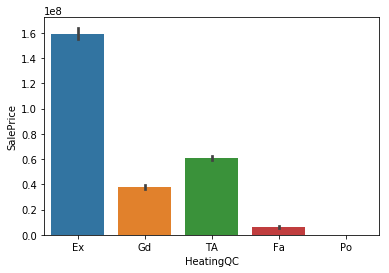

In [119]:
sns.barplot(x='HeatingQC', y='SalePrice',data=train,estimator=sum)

In [108]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,5,65.0,8450,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,2,2008,9,6,208500
1,2,20,5,80.0,9600,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,5,2007,9,6,181500
2,3,60,5,68.0,11250,2,NaN,3,4,2,...,0,NaN,NaN,NaN,0,9,2008,9,6,223500
3,4,70,5,60.0,9550,2,NaN,3,4,2,...,0,NaN,NaN,NaN,0,2,2006,9,4,140000
4,5,60,5,84.0,14260,2,NaN,3,4,2,...,0,NaN,NaN,NaN,0,12,2008,9,6,250000
5,6,50,5,85.0,14115,2,NaN,3,4,2,...,0,NaN,4,4,700,10,2009,9,6,143000
6,7,20,5,75.0,10084,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,8,2007,9,6,307000
7,8,60,5,NaN,10382,2,NaN,3,4,2,...,0,NaN,NaN,4,350,11,2009,9,6,200000
8,9,50,4,51.0,6120,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,4,2008,9,4,129900
9,10,190,5,50.0,7420,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,1,2008,9,6,118000


In [99]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,5,65.0,8450,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,2,2008,9,6,208500
1,2,20,5,80.0,9600,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,5,2007,9,6,181500
2,3,60,5,68.0,11250,2,NaN,3,4,2,...,0,NaN,NaN,NaN,0,9,2008,9,6,223500
3,4,70,5,60.0,9550,2,NaN,3,4,2,...,0,NaN,NaN,NaN,0,2,2006,9,4,140000
4,5,60,5,84.0,14260,2,NaN,3,4,2,...,0,NaN,NaN,NaN,0,12,2008,9,6,250000
5,6,50,5,85.0,14115,2,NaN,3,4,2,...,0,NaN,MnPrv,Shed,700,10,2009,9,6,143000
6,7,20,5,75.0,10084,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,8,2007,9,6,307000
7,8,60,5,NaN,10382,2,NaN,3,4,2,...,0,NaN,NaN,Shed,350,11,2009,9,6,200000
8,9,50,4,51.0,6120,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,4,2008,9,4,129900
9,10,190,5,50.0,7420,2,NaN,4,4,2,...,0,NaN,NaN,NaN,0,1,2008,9,6,118000


In [ ]:
for i in range(ar[:,str_ind].shape[1]):
    col = ar[:,str_ind][:,i]
    col = ['none' if str(x).lower() in {'none', 'nan'} else x for x in col]
    print(i, np.unique(col))